In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather_outbreaks.csv')
df

,Temperature,Humidity,Rainfall,WindSpeed,Outbreak,Region
0,30,85,10,15,1,Accra
1,32,78,0,20,0,Kumasi
2,29,90,15,12,1,Tamale
3,31,88,5,18,1,Takoradi
4,33,80,12,22,0,Ho
5,35,75,0,17,0,Sunyani
6,28,92,20,14,1,Cape Coast
7,30,86,8,16,1,Koforidua
8,34,77,3,19,0,Bolgatanga
9,32,79,7,21,0,Wa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  10 non-null     int64 
 1   Humidity     10 non-null     int64 
 2   Rainfall     10 non-null     int64 
 3   WindSpeed    10 non-null     int64 
 4   Outbreak     10 non-null     int64 
 5   Region       10 non-null     object
dtypes: int64(5), object(1)
memory usage: 612.0+ bytes


In [4]:
df.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
WindSpeed      0
Outbreak       0
Region         0
dtype: int64

In [5]:
df.describe()

,Temperature,Humidity,Rainfall,WindSpeed,Outbreak
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,31.400000,83.000000,8.000000,17.400000,0.500000
std,2.221111,5.944185,6.463573,3.204164,0.527046
min,28.000000,75.000000,0.000000,12.000000,0.000000
25%,30.000000,78.250000,3.500000,15.250000,0.000000
50%,31.500000,82.500000,7.500000,17.500000,0.500000
75%,32.750000,87.500000,11.500000,19.750000,1.000000
max,35.000000,92.000000,20.000000,22.000000,1.000000


Text(0.5, 1.0, 'Plots of Temperature, Humidity and Rainfall')

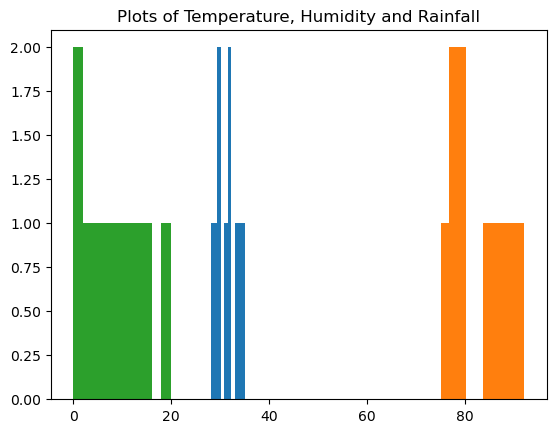

In [6]:
plt.hist(df['Temperature'], label='Temperature')
plt.hist(df['Humidity'], label='Humidity')
plt.hist(df['Rainfall'], label='Rainfall')
plt.title('Plots of Temperature, Humidity and Rainfall')

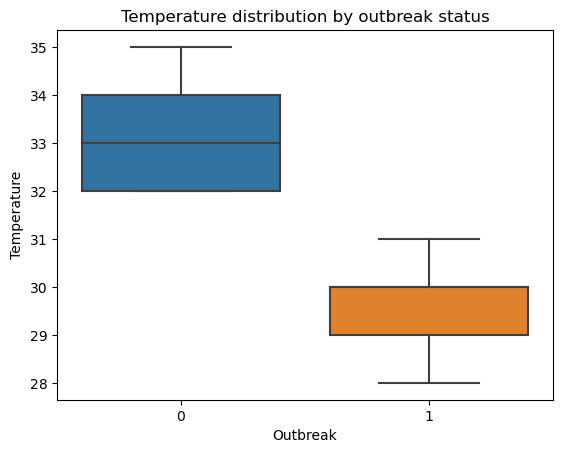

In [7]:
sns.boxplot(data=df, x='Outbreak', y='Temperature')
plt.title('Temperature distribution by outbreak status')
plt.show()


<Axes: xlabel='Region', ylabel='count'>

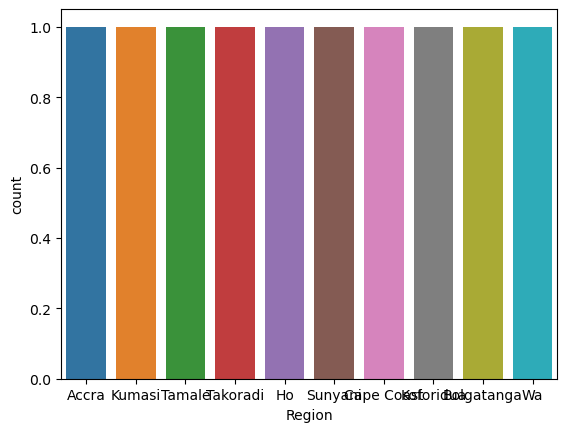

In [8]:
sns.countplot(x = 'Region', data = df)

In [9]:
df['Region']

0         Accra
1        Kumasi
2        Tamale
3      Takoradi
4            Ho
5       Sunyani
6    Cape Coast
7     Koforidua
8    Bolgatanga
9            Wa
Name: Region, dtype: object

In [10]:
regions = {
  "Accra": (5.603717, -0.186964),
  "Kumasi": (6.666600, -1.616271),
  "Tamale": (9.403423,-0.842416),
  "Takoradi": (4.901579,-1.783097),
  "Ho": (6.610149, 0.478549),
  "Sunyani": (7.334941, -2.312303),
  "Cape Coast": (5.131510, -1.279474),
  "Koforidua": (5.673127, -0.166385),
  "Bolgatanga": (10.060074, -0.238539),
  "Wa": (10.060074,-2.509891)
}

df[['Lat', 'Lon']] = df['Region'].map(regions).apply(pd.Series)

In [11]:
df

,Temperature,Humidity,Rainfall,WindSpeed,Outbreak,Region,Lat,Lon
0,30,85,10,15,1,Accra,5.603717,-0.186964
1,32,78,0,20,0,Kumasi,6.666600,-1.616271
2,29,90,15,12,1,Tamale,9.403423,-0.842416
3,31,88,5,18,1,Takoradi,4.901579,-1.783097
4,33,80,12,22,0,Ho,6.610149,0.478549
5,35,75,0,17,0,Sunyani,7.334941,-2.312303
6,28,92,20,14,1,Cape Coast,5.131510,-1.279474
7,30,86,8,16,1,Koforidua,5.673127,-0.166385
8,34,77,3,19,0,Bolgatanga,10.060074,-0.238539
9,32,79,7,21,0,Wa,10.060074,-2.509891


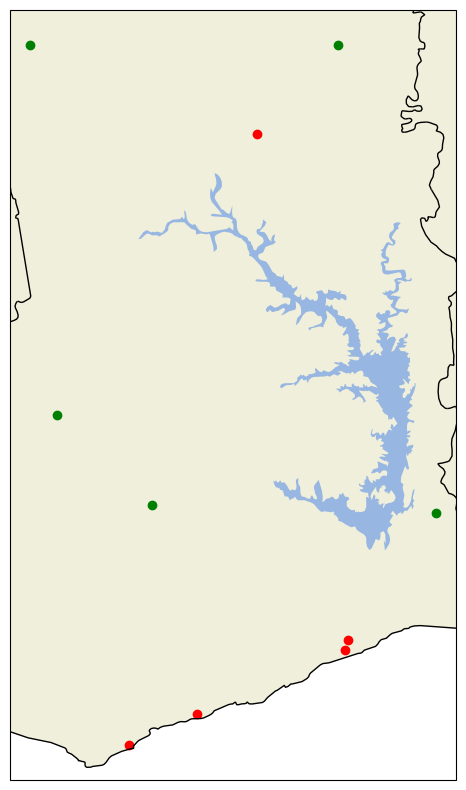

In [12]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.LAND)

for _, row in df.iterrows():
    color='red' if row['Outbreak'] == 1 else 'green'
    ax.scatter(row['Lon'], row['Lat'], marker = 'o', color = color)
        
plt.show()

In [13]:
df['HeatIndex'] = (df['Temperature'] + df['Humidity']) * 0.5

In [14]:
df

,Temperature,Humidity,Rainfall,WindSpeed,Outbreak,Region,Lat,Lon,HeatIndex
0,30,85,10,15,1,Accra,5.603717,-0.186964,57.5
1,32,78,0,20,0,Kumasi,6.666600,-1.616271,55.0
2,29,90,15,12,1,Tamale,9.403423,-0.842416,59.5
3,31,88,5,18,1,Takoradi,4.901579,-1.783097,59.5
4,33,80,12,22,0,Ho,6.610149,0.478549,56.5
5,35,75,0,17,0,Sunyani,7.334941,-2.312303,55.0
6,28,92,20,14,1,Cape Coast,5.131510,-1.279474,60.0
7,30,86,8,16,1,Koforidua,5.673127,-0.166385,58.0
8,34,77,3,19,0,Bolgatanga,10.060074,-0.238539,55.5
9,32,79,7,21,0,Wa,10.060074,-2.509891,55.5


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [17]:
model = LogisticRegression()
X = df[['Temperature', 'Humidity', 'Rainfall', 'WindSpeed']]
y = df['Outbreak']
model.fit(X, y)
y_pred = model.predict(X)
predict = model.predict([[30,85,12,18]])

print('The coefficients are: ', model.coef_)
print('The confusion matrix is: ', confusion_matrix(y, y_pred))
print('The classification report is: ', classification_report(y, y_pred))
print('The accuracy score is: ', accuracy_score(y, y_pred))

The coefficients are:  [[-0.21493333  0.65203364  0.05731563 -0.4131994 ]]
The confusion matrix is:  [[5 0]
 [0 5]]
The classification report is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

The accuracy score is:  1.0
